# Hierarchy Chart

Hierarchy chart biasanya digunakan untuk memvisualisasikan relasi **hirarki** pada suatu data. Pada materi ini akan diperlihatkan bagaimana cara menggunakan hierarchy chart dengan jenis **dendrogram** dan **treemap**.

## 1. Dendrogram

Dendrogram biasanya digunakan pada saat pengelompokkan data (data clustering). Biasanya juga tipe chart ini digunakan pada saat kita akan memvisualisasikan output dari suatu algoritma clustering, misalnya **Agglomerative Clustering**.

Import library yang diperlukan:

In [1]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

Contoh data dengan numpy array (`np.array`) 1 dimensi yang disimpan dalam objek `X`. Kemudian kita memanggil method `linkage()` dari kelas `hierarchy` pada modul `scipy.cluster` untuk mengimplementasikan metode **Agglomerative Clustering**, hasil dari clustering disimpan di dalam objek `Z`.

In [2]:
X = np.array([662, 877, 255, 412, 996, 295, 468, 268, 400, 754, 564, 138, 219, 869, 669])
Z = hierarchy.linkage(X, 'single')

Visualisasikan objek `Z` sebagai parameter pada method `dendrogram()` pada kelas `hierarchy`.

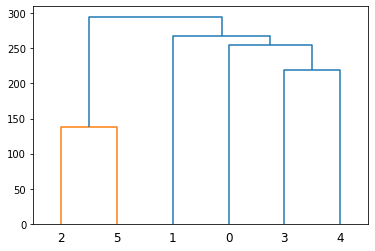

In [3]:
plt.figure()
plot_dendogram = hierarchy.dendrogram(Z)

Kita bisa memberikan kode warna berbeda berdasarkan cabang dengan parameter `color_threshold` dan `above_threshold_color`.

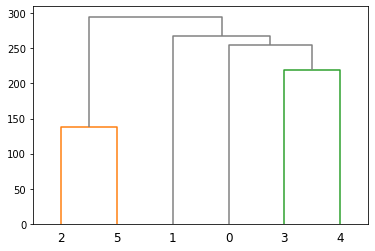

In [4]:
plot_dendogram = hierarchy.dendrogram(Z, # Data
                                      color_threshold=250, # Warna cabang pada threshold tertentu
                                      above_threshold_color='grey') # Warna cabang di atas threshold

### 1.1 Dendrogram dengan Real Dataset

Di bagian ini kita akan menggunakan dataset asli yang berasal dari 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv', dataset akan diimport dan disimpan sebagai DataFrame.

In [5]:
import pandas as pd

In [6]:
url_dataset = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url_dataset)
df = df.set_index('model')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Terapkan metode clustering dengan method `linkage()` pada dataset.

In [7]:
Z = hierarchy.linkage(df, 'ward')

Visualisasikan hasil clustering:

NameError: name 'lbl' is not defined

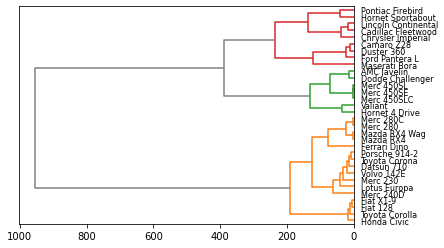

In [8]:
plt.figure()
plot_dendrogram = hierarchy.dendrogram(Z, #
                                 labels=df.index, 
                                 leaf_rotation=0, 
                                 orientation='left', 
                                 color_threshold=240, 
                                 above_threshold_color='grey')
color_palette = plt.cm.get_cmap('Accent', 3)

# Ubah atribut 'cyl' menjadi categorical, sehingga setiap level akan diberi warna berbeda
df['cyl'] = pd.Categorical(df['cyl'])
categorical_color = df['cyl'].cat.codes

ax = plt.gca()
x_labels = ax.get_ymajorticklabels()

num = -1
for label in x_labels:
    num += 1
    color_value = categorical_color[num]
    lbl.set_color(color_palette(color_value))

Buat garis batas (threshold) secara horizontal dengan method `axhline()` pada objek matplotlib `plt` dengan parameter garis threshold 300 (`y=300`), warna abu-abu (`c='grey'`), lebar garis 1 (`lw=1`), dan bentuk garis putus-putus (`linestyle='dashed'`).

In [ ]:
Z = hierarchy.linkage(df, 'ward')
plot_dendrogram = hierarchy.dendrogram(Z, color_threshold=240)
plt.axhline(y=300, c='grey', lw=1, linestyle='dashed')

Kita juga bisa terapkan parameter `color_threshold` dan `above_threshold_color` seperti bagian sebelumnya pada method `dendrogram`.

In [ ]:
Z = hierarchy.linkage(df, 'ward')
hierarchy.set_link_color_palette(['#b30000','#996600', '#b30086'])
hierarchy.dendrogram(Z, color_threshold=240, above_threshold_color='grey')
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

## 2. Treemap

Jenis visualisasi hierarchy selanjutnya adalah Treemap. Untuk membuat grafik Treemap kita perlu modul library tambahan yaitu **Plotly**. Untuk menginstall plotly jalankan perintah `pip install plotly` pada terminal/PowerShell.

Di bagian ini kita hanya akan menggunakan modul `plotly.express` sebagai dasar visualisasi Treemap.

In [ ]:
import plotly.express as px

Contoh data disimpan dalam array `names` dan `parents`.

In [ ]:
fig = px.treemap(
    names = ['Eve','Cain', 'Seth', 'Enos', 'Noam', 'Abel', 'Awan', 'Enoch', 'Azura'],
    parents = ['', 'Eve', 'Eve', 'Seth', 'Seth', 'Eve', 'Eve', 'Awan', 'Eve']
)
fig.show()

Di bagian ini kita akan coba memvisualisasikan sample dataset yang disediakan oleh plotly, yaitu dataset tips dengan cara memanggil method `tips()` pada kelas `px.data`. Data disimpan dalam bentuk Pandas DataFrame.

In [ ]:
df = px.data.tips()
df.head()

Visualisasikan data pada atribut **`total_bill`** pada parameter `values` berdasarkan atribut **`day`**, **`time`**, dan **`sex`** pada parameter `path`.

In [ ]:
fig = px.treemap(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

Jika ingin menggunakan root node sebagai akar hierarki, maka di sini kita akan membuatkan satu atribut baru misalnya **`all`**, kemudian tambahkan atribut tersebut pada parameter `path`.

In [ ]:
df = px.data.tips()
df['all'] = 'all' # Untuk mendapatkan satu node akar dengan nama 'all'
df.head()

In [ ]:
fig = px.treemap(df, path=['all', 'sex', 'day', 'time'], values='total_bill', color='day')
fig.show()

Treemaps pada kelas **`graph_object`** memberikan kita parameter tambahan untuk memodifikasi chart yang akan kita buat.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
labels = ['Eve', 'Cain', 'Seth', 'Enos', 'Noam', 'Abel', 'Awan', 'Enoch', 'Azura']
parents = ['', 'Eve', 'Eve', 'Seth', 'Seth', 'Eve', 'Eve', 'Awan', 'Eve']

Membuat dua buah chart yang divisualisasikan secara vertikal dengan method `make_subplots`, dengan format 2 kolom 1 baris.

In [ ]:
fig = make_subplots(
    cols = 2, rows = 1,
    column_widths = [0.4, 0.4],
    subplot_titles = ("branchvalues: <b>remainder<br />&nbsp;<br />", "branchvalues: <b>total<br />&nbsp;<br />"),
    specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'treemap'}]]
)

In [ ]:
fig.add_trace(go.Treemap(
                    labels = labels,
                    parents = parents,
                    values =  [10, 14, 12, 10, 2, 6, 6, 1, 4],
                    textinfo = 'label+value+percent parent+percent entry+percent root',
                    ),
              row = 1, col = 1)

fig.add_trace(go.Treemap(
                    branchvalues = 'total',
                    labels = labels,
                    parents = parents,
                    values = [65, 14, 12, 10, 2, 6, 6, 1, 4],
                    textinfo = 'label+value+percent parent+percent entry',
                    outsidetextfont = {'size': 20, 'color': 'darkblue'},
                    marker = {'line': {'width': 2}},
                    pathbar = {'visible': False}),
              row = 1, col = 2)

fig.show()